In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
data["MEDV"] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- `CRIM` — уровень преступности на душу населения;
- `ZN` — процент земли, застроенной жилыми домами (только для участков площадью свыше 25000 кв. - футов);
- `INDUS` — процент деловой застройки;
- `CHAS` — 1, если участок граничит с рекой; 0 в противном случае (бинарный признак);
- `NOX` — концентрация оксида азота, деленная на 10^7;
- `RM` — среднее число комнат (по всем домам рассматриваемого участка);
- `AGE` — процент домов, построенных до 1940 г. и занимаемых владельцами;
- `DIS` — взвешенное расстояние до 5 деловых центров Бостона;
- `RAD` — индекс удаленности до радиальных магистралей;
- `TAX` — величина налога в `$10000`;
- `PTRATIO` — количество учащихся, приходящихся на одного учителя (по городу);
- `B` = 1000(AA − 0.63)^2, где `AA` — доля афро-американцев;
- `LSTAT` — процент жителей с низким социальным статусом;
- `MEDV` — Median value of owner-occupied homes in `$1000`.
Признак `CHAS` — бинарный, остальные — количественные. Выходом является переменная `MEDV`, равная медианному значению цены строения (по всем домам участка) в `$1000`.

> Объясните почему значение коэффициента корреляции между `MEDV` и переменными `RM` и `LSTAT` имеет противоположные знаки (исходя из описания переменных).

> ___Показатель RM (количество комнат) имеет положительное влияние на стоимоть жилья, в то время как LSTAT (процент жителей с низким социальным статусом) имеет негативное влияние на стоимость жилья___

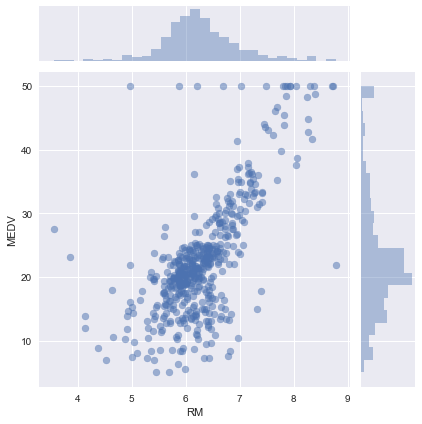

In [6]:
sns.jointplot(data["RM"], data["MEDV"], kind="scatter", joint_kws={"alpha":0.5});

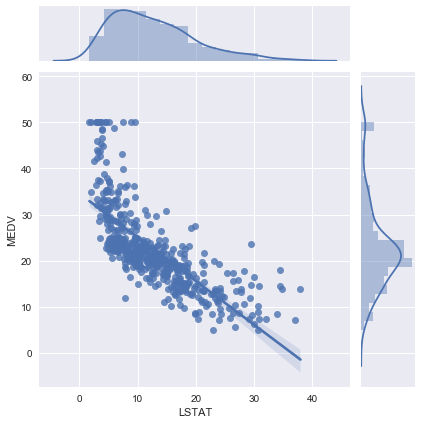

In [7]:
sns.jointplot(data["LSTAT"], data["MEDV"], kind="reg");

In [8]:
data[["RM", "MEDV"]].describe()

,RM,MEDV
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


Также можем сделать следующие предположения:

- 16 наблюдений `MEDV` имеют значение 50.0. Скорее всего эти наблюдения содержали пропуски или не было возможности указать действительную цену дома, поэтому эти наблюдения могут быть исключены из набора данных.
- одно наблюдение признака `RM` имеет значение 8.78. Это наблюдение может рассматриваться как выброс и может быть исключено из набора данных;
- два наблюдения признака `RM` имеют значения меньше 4. Наблюдения можно рассматривать как выбросы и должны быть исключены из набора данных.

Итак, модель которую мы будем строить имеет следующий вид:

$$MEDV = \theta_0 + \theta_1 \times RM$$

Исключаем выбросы

In [17]:
data = data.loc[data['MEDV'] != 50]
data = data.loc[data['RM'] != 8.78]
data = data.loc[data['RM'] > 4]

Также я посчитал выбросами значения `MEDV` равные 5.0

In [18]:
data = data.loc[data['MEDV'] != 5]
data.shape

(485, 14)

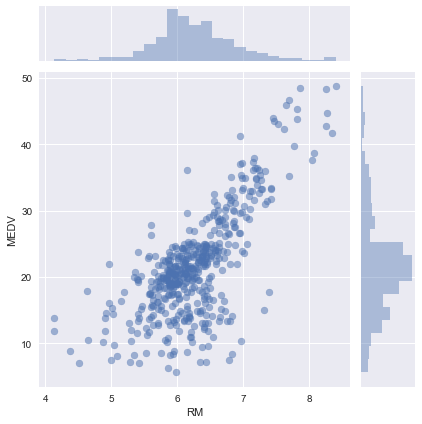

In [23]:
sns.jointplot(data["RM"], data["MEDV"], kind="scatter", joint_kws={"alpha":0.5});

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm

In [71]:
X = data["RM"]
y = data["MEDV"]

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=18)
Y_train

12     21.7
300    24.8
136    17.4
248    24.5
96     21.4
       ... 
196    33.3
336    19.5
120    22.0
286    20.1
309    20.3
Name: MEDV, Length: 324, dtype: float64

In [82]:
class GDRegressor:

    def __init__(self, alpha=0.04, n_iter=100, progress=True):
        self.alpha = alpha
        self.n_iter = n_iter
        self.disable = not progress
        

    def fit(self, X, y):
        # PUT YOUR CODE HERE
        theta_zero = 0
        theta_one = 0
        theta_zero_history = []
        theta_one_history = []
        cost_history = []
        for i in range(self.n_iter):
            for_cost = 0
            error_zero = 0
            error_one = 0
            
            for j in range(1, len(list(y))):
                error_one += ((theta_zero + theta_one*(list(X)[j]) - list(y)[j])*(list(X)[j]))
            for j in range(1, len(list(y))):
                error_zero += (theta_zero + theta_one*(list(X)[j]) - list(y)[j])
                for_cost += (theta_zero + theta_one*(list(X)[j]) - (list(y)[j]))**2
            
            grad_one = error_one*self.alpha/len(Y_train)
            grad_zero = error_zero*self.alpha/len(Y_train)
            theta_zero -= grad_zero
            theta_one -= grad_one
            
            theta_zero_history.append(theta_zero)
            theta_one_history.append(theta_one)
            cost = for_cost/(2*len(Y_train))
            cost_history.append(cost)
            self.coef_ = theta_one
            self.intercept_ = theta_zero
        return self.coef_, self.intercept_

    def predict(self, X_test):
        # PUT YOUR CODE HERE
        pass

In [83]:
model = GDRegressor(alpha=0.02, n_iter=100)
print(model.fit(X_train, Y_train))

(3.5058295094104883, -0.04798229084250541)


In [84]:
model.coef_

3.5058295094104883